
# 🩺 Diabetes Dataset Preprocessing & Outlier Detection

## Project Overview
This project focuses on **data preprocessing and outlier detection** for a diabetes dataset.  
The main steps include:
- Handling missing values
- Exploratory Data Analysis (EDA)
- Outlier detection using different statistical and machine learning methods

⚠️ Note: This notebook does not include machine learning modeling. The focus is solely on **data cleaning and preparing the dataset** for further analysis.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
import math




In [ ]:
df=pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\feature engineering\diabetes (2).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


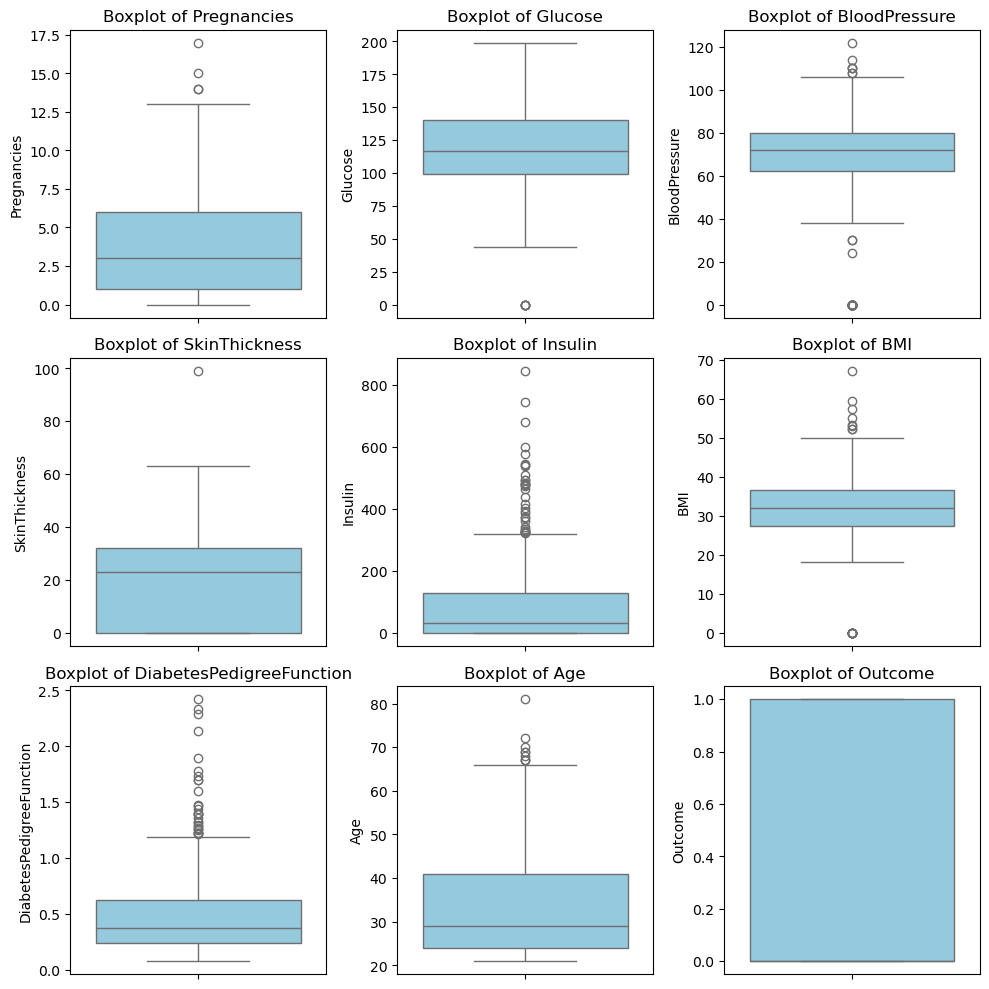

In [ ]:
n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Feature Distributions and Skewness

The following plots show the distribution of each feature in the diabetes dataset along with their skewness values. Skewness indicates the asymmetry of the distribution:
- **Positive skew**: tail on the right (e.g., Insulin, DiabetesPedigreeFunction)
- **Negative skew**: tail on the left (e.g., BloodPressure, BMI)


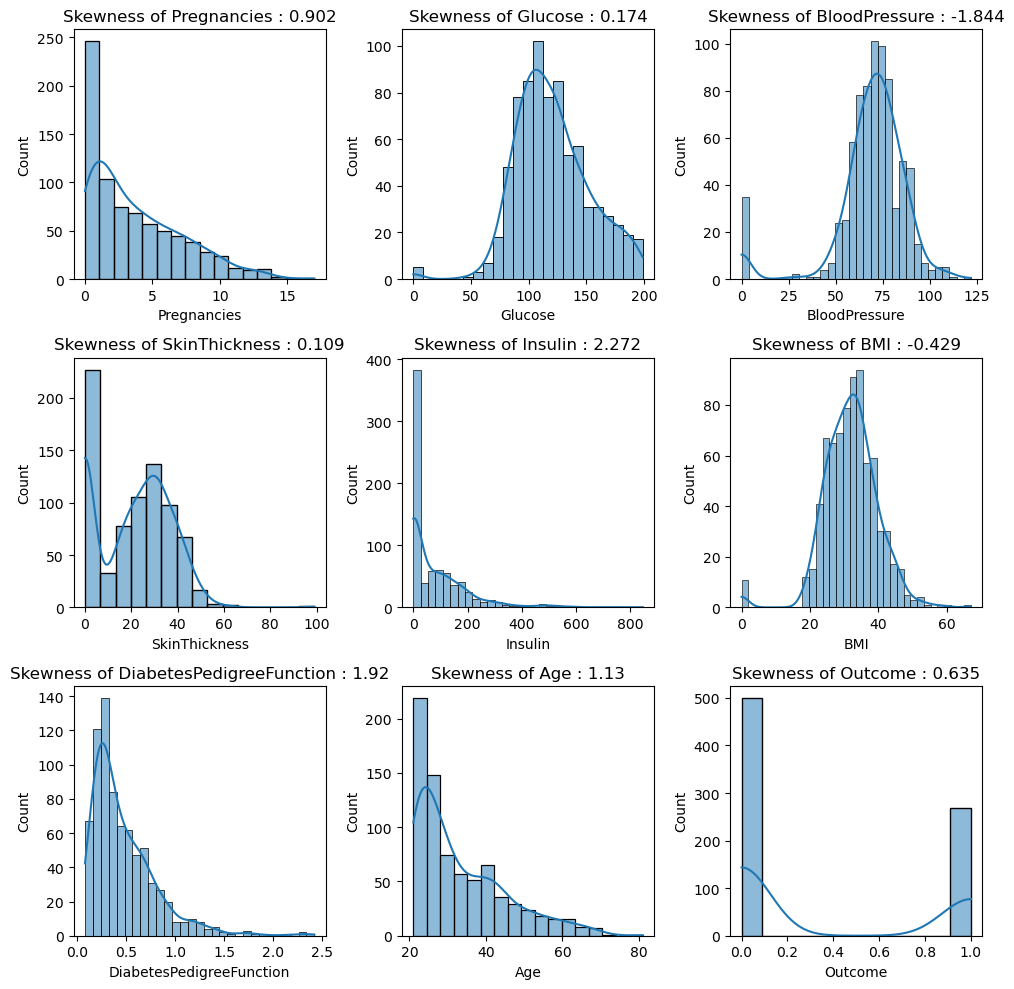

In [ ]:
n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Skewness of {col} : {round(df[col].skew(), 3)}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#**Interpretation of Distributions:**

- **Pregnancies (Skewness = 0.902)**: Slightly right-skewed. Most patients have few pregnancies.
- **Glucose (Skewness = 0.174)**: Almost symmetric. Values are centered around normal blood glucose levels.
- **BloodPressure (Skewness = -1.844)**: Left-skewed. Many patients have lower blood pressure values, with few higher outliers.
- **SkinThickness (Skewness = 0.109)**: Nearly symmetric but with some extreme low values (possible missing data coded as 0).
- **Insulin (Skewness = 2.272)**: Strongly right-skewed. Many low or zero values indicate missing data; few patients have very high insulin levels.
- **BMI (Skewness = -0.429)**: Slight left-skew. Most patients are around normal to overweight BMI.
- **DiabetesPedigreeFunction (Skewness = 1.92)**: Strong right-skew. Most values are low, but some families show high genetic risk.
- **Age (Skewness = 1.13)**: Right-skewed. More younger patients; fewer older patients.
- **Outcome (Skewness = 0.635)**: Right-skewed. More non-diabetic patients than diabetic patients.


In [ ]:
column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[column] = df[column].replace(0, np.nan)

count = df.isna().sum()
percentage = round((df.isna().sum() / len(df)) * 100, 2)

pd.DataFrame({'Count': count, 'Percentage (%)': percentage}).sort_values(by='Count', ascending=False)

,Count,Percentage (%)
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65
Pregnancies,0,0.00
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


#**Interpretation of Missing Values by Feature**

**Insulin (48.7% missing):** Insulin measurements often have a high rate of missing values because this test requires specific blood work that may not be performed for all patients. Factors such as testing costs, patient fasting requirements, or clinical judgment deeming the test unnecessary can contribute to this missingness.

**SkinThickness (29.56% missing):** Skin thickness, used to estimate body fat, is frequently missing due to its challenging measurement process. It requires precise technique and equipment, and may be skipped in some clinical settings where it is not considered essential or standardized, leading to a substantial portion of missing data.

**BloodPressure (4.56% missing):** Blood pressure readings are generally routine but can be missing due to occasional equipment malfunction, recording errors, or patient-related issues such as non-compliance during measurement.

**BMI (1.43% missing):** Body Mass Index depends on accurate height and weight records. Missing BMI values often result from incomplete or inaccurate input of these precursor measurements, though the missingness is minimal due to the routine nature of these assessments.

**Glucose (0.65% missing):** Glucose is a critical indicator for diabetes screening. Missing glucose values are rare and usually caused by failed tests, data entry mistakes, or patients not fasting prior to measurement when required.

**Pregnancies, DiabetesPedigreeFunction, Age, Outcome (0% missing):** These features are fundamental demographic and diagnostic variables, typically collected as standard practice in clinical assessments and research. Their completeness reflects their essential role in diabetes diagnosis and monitoring.

#**Handling Missing Values**

Missing data is a common challenge in real-world datasets and can bias analyses or reduce model performance if not properly addressed. In this dataset, Insulin (48.7%) and SkinThickness (29.6%) have high missingness and require careful imputation, while BloodPressure, BMI, and Glucose (<5%) have moderate missing values that I can reliably fill, and Pregnancies, Age, DiabetesPedigreeFunction, and Outcome are complete. I applied KNN imputation, which leverages correlations between features to predict missing values while preserving the overall distribution and relationships in the data. The following sections detail feature-wise imputation, accompanied by statistical checks and visualizations to ensure the quality of the imputed data.

Moyenne avant imputation : 121.69
Écart-type avant imputation : 30.54
Moyenne après imputation : 121.62
Écart-type après imputation : 30.51
Test t : t_stat = 0.042, p-value = 0.966


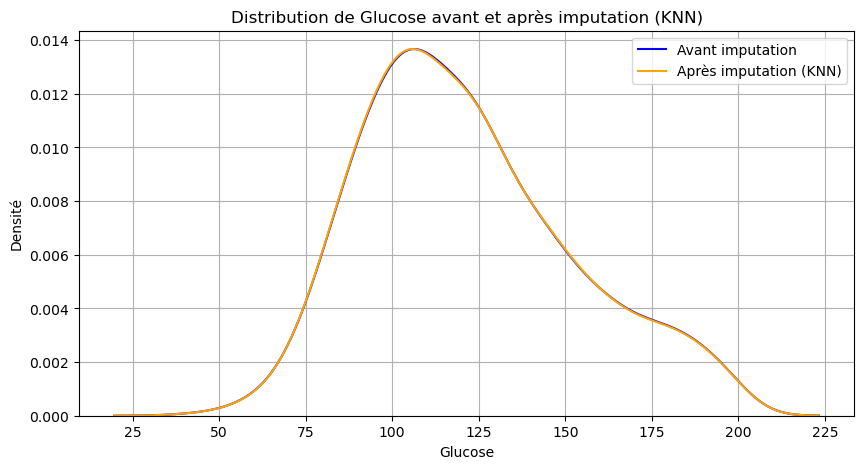

In [ ]:
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind

# 1. Sauvegarder la distribution originale (valeurs non manquantes) de Glucose
glucose_before = df['Glucose'].dropna()

# 2. Colonnes nécessaires pour prédire Glucose (à adapter selon ta data)
features_for_knn = ['Glucose', 'Pregnancies', 'Age', 'BMI', 'BloodPressure']
df_knn_subset = df[features_for_knn]

# 3. Appliquer KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(df_knn_subset)

# 4. Extraire la colonne imputée de Glucose (colonne 0)
glucose_imputed = imputed_array[:, 0]

# 5. Mettre à jour uniquement la colonne 'Glucose' dans df
df['Glucose'] = glucose_imputed

# 6. Calculer moyenne et écart-type avant et après imputation
mean_before = glucose_before.mean()
std_before = glucose_before.std()

mean_after = df['Glucose'].mean()
std_after = df['Glucose'].std()

print(f"Moyenne avant imputation : {mean_before:.2f}")
print(f"Écart-type avant imputation : {std_before:.2f}")
print(f"Moyenne après imputation : {mean_after:.2f}")
print(f"Écart-type après imputation : {std_after:.2f}")

# 7. Test statistique t-test pour comparer les deux distributions (valeurs avant vs valeurs imputées)
# On compare valeurs non manquantes avant avec toutes valeurs après imputation
t_stat, p_val = ttest_ind(glucose_before, df['Glucose'], equal_var=False)
print(f"Test t : t_stat = {t_stat:.3f}, p-value = {p_val:.3f}")

# 8. Visualisation avant/après imputation
plt.figure(figsize=(10, 5))
sns.kdeplot(glucose_before, label='Avant imputation', color='blue')
sns.kdeplot(df['Glucose'], label='Après imputation (KNN)', color='orange')
plt.xlabel('Glucose')
plt.ylabel('Densité')
plt.title('Distribution de Glucose avant et après imputation (KNN)')
plt.legend()
plt.grid(True)
plt.show()


Moyenne avant imputation : 32.46
Écart-type avant imputation : 6.92
Moyenne après imputation : 32.43
Écart-type après imputation : 6.89
Test t : t_stat = 0.077, p-value = 0.938


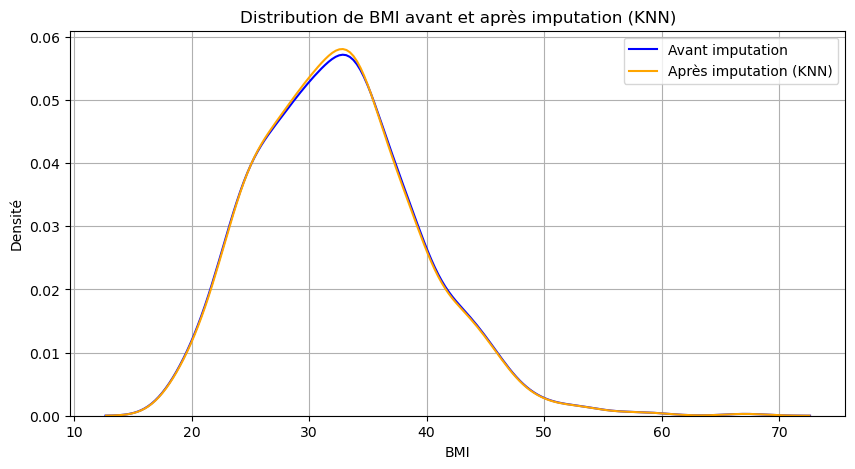

In [ ]:
# 1. Sauvegarde de la distribution originale (valeurs non nulles)
bmi_before = df['BMI'].dropna()

# 2. Colonnes utilisées pour l'imputation (tu peux ajuster selon ta data)
features_for_knn = ['BMI', 'Age', 'Glucose', 'Pregnancies', 'BloodPressure']
df_knn_subset = df[features_for_knn]

# 3. Appliquer le KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(df_knn_subset)

# 4. Extraire la colonne imputée BMI (colonne 0)
bmi_imputed = imputed_array[:, 0]

# 5. Mise à jour de la colonne 'BMI' dans le DataFrame
df['BMI'] = bmi_imputed

# 6. Moyenne et écart-type avant/après imputation
mean_before = bmi_before.mean()
std_before = bmi_before.std()
mean_after = df['BMI'].mean()
std_after = df['BMI'].std()

print(f"Moyenne avant imputation : {mean_before:.2f}")
print(f"Écart-type avant imputation : {std_before:.2f}")
print(f"Moyenne après imputation : {mean_after:.2f}")
print(f"Écart-type après imputation : {std_after:.2f}")

# 7. Test statistique (t-test)
t_stat, p_val = ttest_ind(bmi_before, df['BMI'], equal_var=False)
print(f"Test t : t_stat = {t_stat:.3f}, p-value = {p_val:.3f}")

# 8. Visualisation avant/après imputation
plt.figure(figsize=(10, 5))
sns.kdeplot(bmi_before, label='Avant imputation', color='blue')
sns.kdeplot(df['BMI'], label='Après imputation (KNN)', color='orange')
plt.xlabel('BMI')
plt.ylabel('Densité')
plt.title('Distribution de BMI avant et après imputation (KNN)')
plt.legend()
plt.grid(True)
plt.show()


Moyenne avant imputation : 72.41
Écart-type avant imputation : 12.38
Moyenne après imputation : 72.36
Écart-type après imputation : 12.18
Test t : t_stat = 0.065, p-value = 0.948


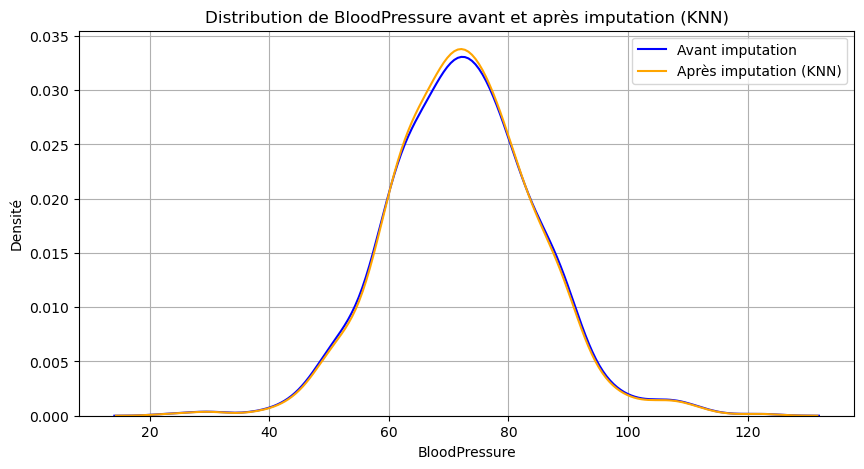

In [ ]:

# 1. Distribution originale (valeurs non nulles)
bp_before = df['BloodPressure'].dropna()

# 2. Sélection des colonnes pertinentes pour prédire BloodPressure
features_for_knn = ['BloodPressure', 'Age', 'BMI', 'Glucose', 'Pregnancies']
df_knn_subset = df[features_for_knn]

# 3. Imputation par KNN
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(df_knn_subset)

# 4. Extraire la colonne imputée BloodPressure (colonne 0)
bp_imputed = imputed_array[:, 0]

# 5. Mise à jour de la colonne dans df
df['BloodPressure'] = bp_imputed

# 6. Moyenne et écart-type avant/après
mean_before = bp_before.mean()
std_before = bp_before.std()
mean_after = df['BloodPressure'].mean()
std_after = df['BloodPressure'].std()

print(f"Moyenne avant imputation : {mean_before:.2f}")
print(f"Écart-type avant imputation : {std_before:.2f}")
print(f"Moyenne après imputation : {mean_after:.2f}")
print(f"Écart-type après imputation : {std_after:.2f}")

# 7. Test t de Student
t_stat, p_val = ttest_ind(bp_before, df['BloodPressure'], equal_var=False)
print(f"Test t : t_stat = {t_stat:.3f}, p-value = {p_val:.3f}")

# 8. Visualisation de la distribution avant/après
plt.figure(figsize=(10, 5))
sns.kdeplot(bp_before, label='Avant imputation', color='blue')
sns.kdeplot(df['BloodPressure'], label='Après imputation (KNN)', color='orange')
plt.xlabel('BloodPressure')
plt.ylabel('Densité')
plt.title('Distribution de BloodPressure avant et après imputation (KNN)')
plt.legend()
plt.grid(True)
plt.show()


Moyenne avant imputation : 29.15
Écart-type avant imputation : 10.48
Moyenne après imputation : 29.11
Écart-type après imputation : 9.66
Test t : t_stat = 0.080, p-value = 0.936


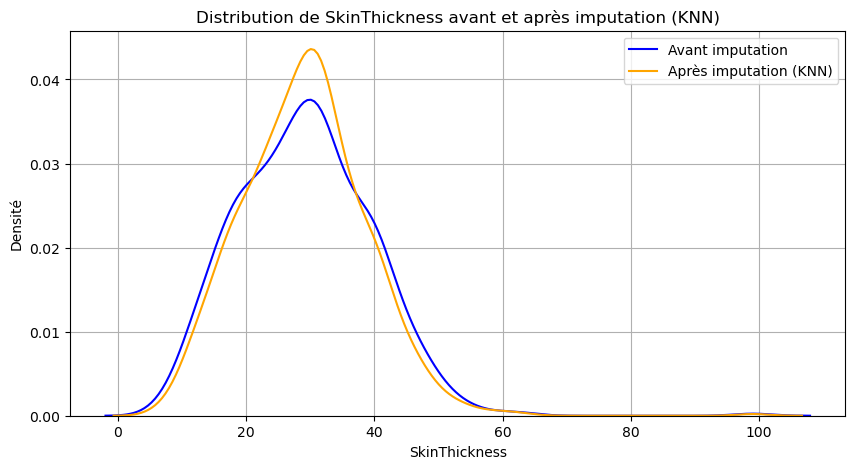

In [ ]:
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sauvegarder la distribution originale (valeurs non manquantes) de SkinThickness
skin_before = df['SkinThickness'].dropna()

# 2. Colonnes nécessaires pour prédire SkinThickness
features_for_knn = ['SkinThickness', 'Age', 'BMI', 'BloodPressure', 'Glucose']
df_knn_subset = df[features_for_knn]

# 3. Appliquer KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
imputed_array = knn_imputer.fit_transform(df_knn_subset)

# 4. Extraire la colonne imputée de SkinThickness (colonne 0)
skin_imputed = imputed_array[:, 0]

# 5. Mettre à jour uniquement la colonne 'SkinThickness' dans df
df['SkinThickness'] = skin_imputed

# 6. Calculer moyenne et écart-type avant et après imputation
mean_before = skin_before.mean()
std_before = skin_before.std()

mean_after = df['SkinThickness'].mean()
std_after = df['SkinThickness'].std()

print(f"Moyenne avant imputation : {mean_before:.2f}")
print(f"Écart-type avant imputation : {std_before:.2f}")
print(f"Moyenne après imputation : {mean_after:.2f}")
print(f"Écart-type après imputation : {std_after:.2f}")

# 7. Test t pour comparer les distributions avant/après
t_stat, p_val = ttest_ind(skin_before, df['SkinThickness'], equal_var=False)
print(f"Test t : t_stat = {t_stat:.3f}, p-value = {p_val:.3f}")

# 8. Visualisation avant/après imputation
plt.figure(figsize=(10, 5))
sns.kdeplot(skin_before, label='Avant imputation', color='blue')
sns.kdeplot(df['SkinThickness'], label='Après imputation (KNN)', color='orange')
plt.xlabel('SkinThickness')
plt.ylabel('Densité')
plt.title('Distribution de SkinThickness avant et après imputation (KNN)')
plt.legend()
plt.grid(True)
plt.show()


Moyenne avant imputation : 155.55
Écart-type avant imputation : 118.78
Moyenne après imputation : 154.16
Écart-type après imputation : 100.82
Test t : t_stat = 0.198, p-value = 0.843


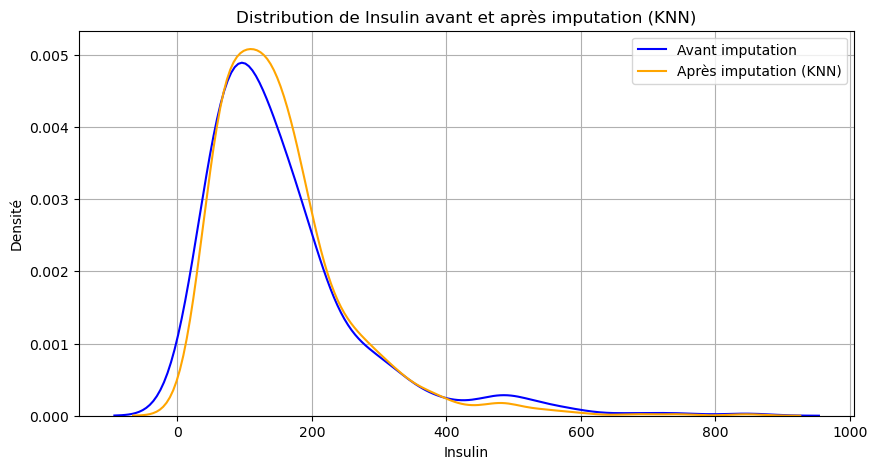

In [ ]:
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sauvegarder la distribution originale (valeurs non manquantes) de Insulin
insulin_before = df['Insulin'].dropna()

# 2. Colonnes nécessaires pour prédire Insulin
features_for_knn = ['Insulin', 'Glucose', 'BMI', 'Age', 'BloodPressure']
df_knn_subset = df[features_for_knn]

# 3. Appliquer KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
imputed_array = knn_imputer.fit_transform(df_knn_subset)

# 4. Extraire la colonne imputée de Insulin (colonne 0)
insulin_imputed = imputed_array[:, 0]

# 5. Mettre à jour uniquement la colonne 'Insulin' dans df
df['Insulin'] = insulin_imputed

# 6. Calculer moyenne et écart-type avant et après imputation
mean_before = insulin_before.mean()
std_before = insulin_before.std()

mean_after = df['Insulin'].mean()
std_after = df['Insulin'].std()

print(f"Moyenne avant imputation : {mean_before:.2f}")
print(f"Écart-type avant imputation : {std_before:.2f}")
print(f"Moyenne après imputation : {mean_after:.2f}")
print(f"Écart-type après imputation : {std_after:.2f}")

# 7. Test t pour comparer les distributions avant/après
t_stat, p_val = ttest_ind(insulin_before, df['Insulin'], equal_var=False)
print(f"Test t : t_stat = {t_stat:.3f}, p-value = {p_val:.3f}")

# 8. Visualisation avant/après imputation
plt.figure(figsize=(10, 5))
sns.kdeplot(insulin_before, label='Avant imputation', color='blue')
sns.kdeplot(df['Insulin'], label='Après imputation (KNN)', color='orange')
plt.xlabel('Insulin')
plt.ylabel('Densité')
plt.title('Distribution de Insulin avant et après imputation (KNN)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Standardiser les données
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Méthode 1: KNN (Distance au plus proche voisin)
nbrs = NearestNeighbors(n_neighbors=2)
distances, indices = nbrs.fit(X_scaled).kneighbors(X_scaled)
# On prend la 2e plus petite distance (1re est 0 car point lui-même)
knn_distances = np.sort(distances[:, 1])
# Heuristique: seuil = 95e percentile
knn_threshold = np.percentile(knn_distances, 95)
knn_outliers = distances[:, 1] > knn_threshold
knn_outlier_count = np.sum(knn_outliers)

# Méthode 2: Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
lof_labels = lof.fit_predict(X_scaled)
lof_outlier_count = np.sum(lof_labels == -1)

# Méthode 3: DBSCAN
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_outlier_count = np.sum(dbscan_labels == -1)

# Résumé
outlier_counts = {
    'KNN': knn_outlier_count,
    'LOF': lof_outlier_count,
    'DBSCAN': dbscan_outlier_count
}

outlier_counts


{'KNN': 39, 'LOF': 16, 'DBSCAN': 44}

Outliers can bias analysis and affect model performance, so I applied three complementary methods to detect them. Using KNN, I flagged points whose distance to the nearest neighbor exceeded the 95th percentile, detecting 39 outliers. With Local Outlier Factor (LOF), I identified 16 points that deviate significantly from their local neighborhood density, while DBSCAN labeled 44 points as outliers because they did not belong to any dense cluster. Each method captures anomalies differently—distance-based (KNN), local density-based (LOF), and clustering-based (DBSCAN)—providing a robust overview of potential outliers for further preprocessing.

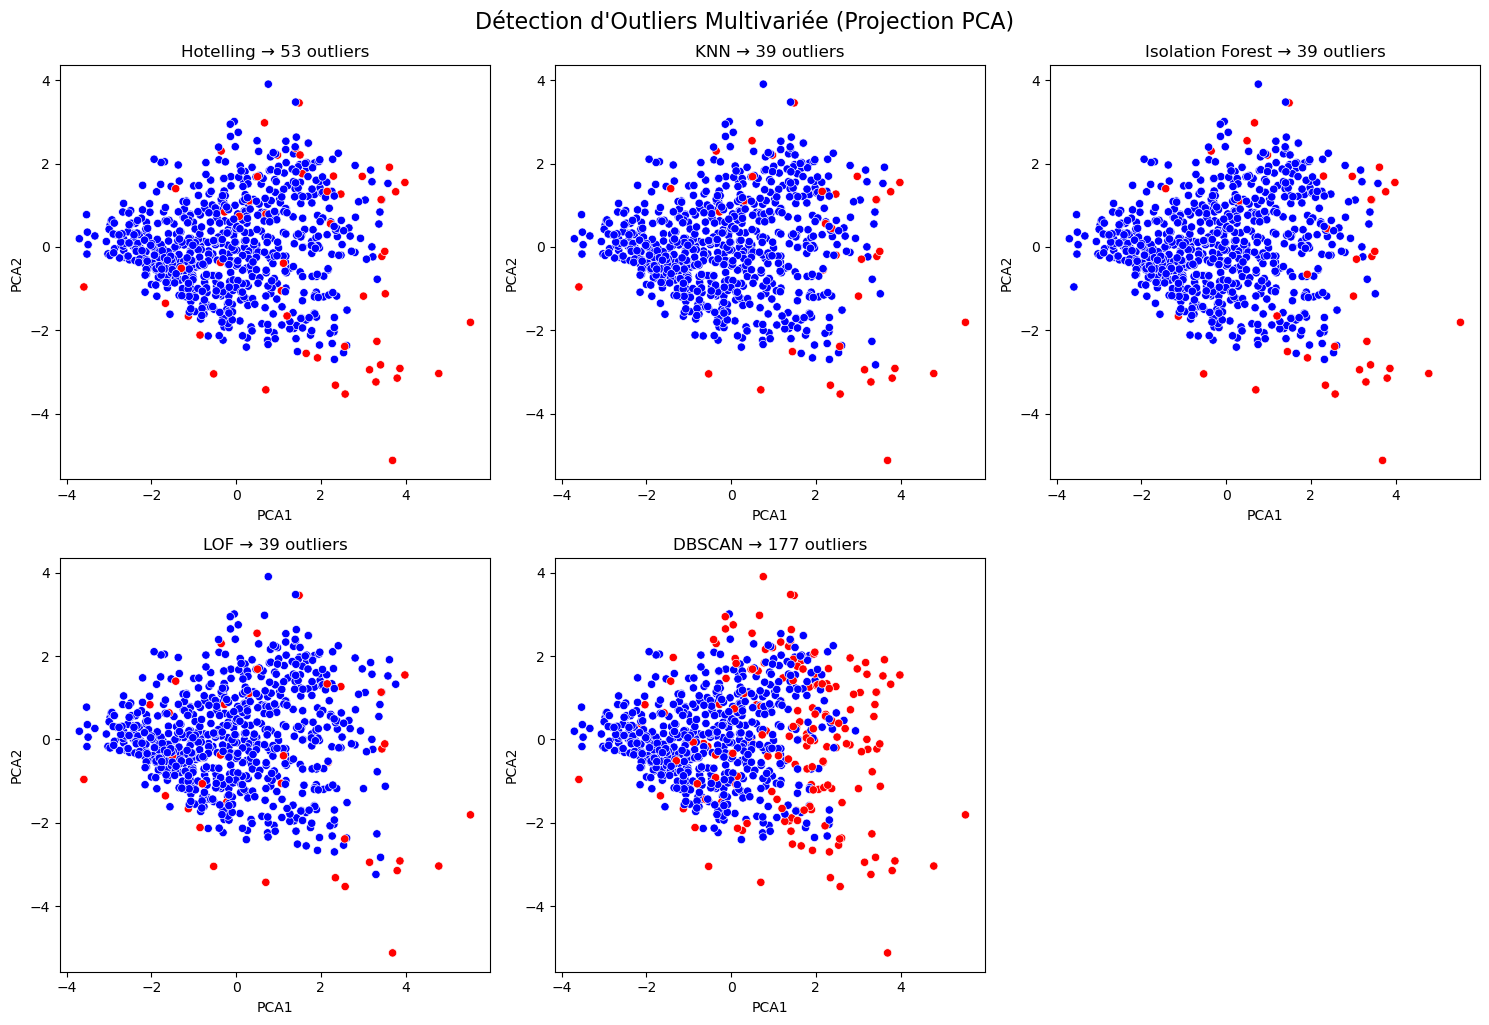

{'Hotelling': 53, 'KNN': 39, 'Isolation Forest': 39, 'LOF': 39, 'DBSCAN': 177}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance
from sklearn.cluster import DBSCAN
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Simulation des données utilisateur (df avec les colonnes indiquées)
# Cette cellule suppose que le DataFrame `df` est déjà défini avec les colonnes requises.

# Variables sélectionnées
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data = df[features].dropna().copy()  # S'assurer qu'il n'y a pas de NA

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# PCA pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Résultats stockés ici
results = {}

# 1. Hotelling's T-squared (via Mahalanobis distance)
cov = EmpiricalCovariance().fit(X_scaled)
mahalanobis_dist = cov.mahalanobis(X_scaled)
threshold = chi2.ppf(0.975, df=X_scaled.shape[1])  # seuil à 97.5%
outliers_hotelling = np.where(mahalanobis_dist > threshold)[0]
results['Hotelling'] = outliers_hotelling

# 2. K-Nearest Neighbors (distance au plus proche voisin)
nbrs = NearestNeighbors(n_neighbors=5).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
knn_dist = distances[:, -1]  # distance au 5e plus proche voisin
threshold_knn = np.percentile(knn_dist, 95)
outliers_knn = np.where(knn_dist > threshold_knn)[0]
results['KNN'] = outliers_knn

# 3. Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
pred_iso = iso.fit_predict(X_scaled)
outliers_iso = np.where(pred_iso == -1)[0]
results['Isolation Forest'] = outliers_iso

# 4. Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
pred_lof = lof.fit_predict(X_scaled)
outliers_lof = np.where(pred_lof == -1)[0]
results['LOF'] = outliers_lof

# 5. DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
pred_dbscan = dbscan.fit_predict(X_scaled)
outliers_dbscan = np.where(pred_dbscan == -1)[0]
results['DBSCAN'] = outliers_dbscan

# Résumé du nombre d'outliers détectés
summary = {method: len(idx) for method, idx in results.items()}

# Visualisation dans l'espace PCA
plt.figure(figsize=(15, 10))
for i, (method, idx) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=np.isin(range(len(X_pca)), idx), palette=["blue", "red"], legend=False)
    plt.title(f"{method} → {len(idx)} outliers")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
plt.tight_layout()
plt.suptitle("Détection d'Outliers Multivariée (Projection PCA)", fontsize=16, y=1.02)
plt.show()

summary


In [ ]:
# Afficher les données détectées comme outliers pour chaque méthode
for method, idx in results.items():
    print(f"\n🔍 Outliers détectés par {method} ({len(idx)} individus) :")
    display(data.iloc[idx])


🔍 Outliers détectés par Hotelling (53 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137.0,40.0,35.000000,168.000000,43.10,2.288,33
8,2,197.0,70.0,45.000000,543.000000,30.50,0.158,53
13,1,189.0,60.0,23.000000,846.000000,30.10,0.398,59
18,1,103.0,30.0,38.000000,83.000000,43.30,0.183,33
43,9,171.0,110.0,24.000000,240.000000,45.40,0.721,54
45,0,180.0,66.0,39.000000,375.666667,42.00,1.893,25
57,0,100.0,88.0,60.000000,110.000000,46.80,0.962,31
58,0,146.0,82.0,41.333333,182.333333,40.50,1.781,44
106,1,96.0,122.0,30.000000,85.000000,22.40,0.207,27
120,0,162.0,76.0,56.000000,100.000000,53.20,0.759,25



🔍 Outliers détectés par KNN (39 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53
13,1,189.0,60.0,23.000000,846.000000,30.1,0.398,59
39,4,111.0,72.0,47.000000,207.000000,37.1,1.390,56
43,9,171.0,110.0,24.000000,240.000000,45.4,0.721,54
45,0,180.0,66.0,39.000000,375.666667,42.0,1.893,25
58,0,146.0,82.0,41.333333,182.333333,40.5,1.781,44
84,5,137.0,108.0,38.333333,114.333333,48.8,0.227,37
106,1,96.0,122.0,30.000000,85.000000,22.4,0.207,27
120,0,162.0,76.0,56.000000,100.000000,53.2,0.759,25



🔍 Outliers détectés par Isolation Forest (39 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53
13,1,189.0,60.0,23.000000,846.000000,30.1,0.398,59
18,1,103.0,30.0,38.000000,83.000000,43.3,0.183,33
43,9,171.0,110.0,24.000000,240.000000,45.4,0.721,54
45,0,180.0,66.0,39.000000,375.666667,42.0,1.893,25
57,0,100.0,88.0,60.000000,110.000000,46.8,0.962,31
120,0,162.0,76.0,56.000000,100.000000,53.2,0.759,25
125,1,88.0,30.0,42.000000,99.000000,55.0,0.496,26
159,17,163.0,72.0,41.000000,114.000000,40.9,0.817,47



🔍 Outliers détectés par LOF (39 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137.0,40.0,35.000000,168.000000,43.10,2.288,33
8,2,197.0,70.0,45.000000,543.000000,30.50,0.158,53
13,1,189.0,60.0,23.000000,846.000000,30.10,0.398,59
18,1,103.0,30.0,38.000000,83.000000,43.30,0.183,33
39,4,111.0,72.0,47.000000,207.000000,37.10,1.390,56
45,0,180.0,66.0,39.000000,375.666667,42.00,1.893,25
62,5,44.0,62.0,29.333333,42.000000,25.00,0.587,36
106,1,96.0,122.0,30.000000,85.000000,22.40,0.207,27
120,0,162.0,76.0,56.000000,100.000000,53.20,0.759,25
125,1,88.0,30.0,42.000000,99.000000,55.00,0.496,26



🔍 Outliers détectés par DBSCAN (177 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2,8,183.0,64.0,26.000000,211.666667,23.3,0.672,32
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53
12,10,139.0,80.0,24.000000,176.666667,27.1,1.441,57
13,1,189.0,60.0,23.000000,846.000000,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.000000,510.000000,43.3,0.222,26
756,7,137.0,90.0,41.000000,255.000000,32.0,0.391,39
757,0,123.0,72.0,24.000000,290.666667,36.3,0.258,52
759,6,190.0,92.0,28.666667,257.333333,35.5,0.278,66


In [ ]:
# Convertir tous les indices en ensembles pour faciliter les opérations
outlier_sets = {method: set(indices) for method, indices in results.items()}

# Trouver les outliers exclusifs à chaque méthode
exclusive_outliers = {}

for method in outlier_sets:
    others = set().union(*(v for k, v in outlier_sets.items() if k != method))
    exclusive_outliers[method] = outlier_sets[method] - others

In [ ]:
for method, idx_set in exclusive_outliers.items():
    print(f"\n🔍 Outliers détectés *uniquement* par {method} ({len(idx_set)} individus) :")
    if idx_set:
        display(data.iloc[list(idx_set)])
    else:
        print("Aucun outlier exclusif détecté.")


🔍 Outliers détectés *uniquement* par Hotelling (1 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
666,4,145.0,82.0,18.0,240.0,32.5,0.235,70



🔍 Outliers détectés *uniquement* par KNN (0 individus) :
Aucun outlier exclusif détecté.

🔍 Outliers détectés *uniquement* par Isolation Forest (0 individus) :
Aucun outlier exclusif détecté.

🔍 Outliers détectés *uniquement* par LOF (1 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
279,2,108.0,62.0,10.0,278.0,25.3,0.881,22



🔍 Outliers détectés *uniquement* par DBSCAN (112 individus) :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
512,9,91.0,68.0,27.000000,188.000000,24.2,0.200,58
2,8,183.0,64.0,26.000000,211.666667,23.3,0.672,32
12,10,139.0,80.0,24.000000,176.666667,27.1,1.441,57
532,1,86.0,66.0,52.000000,65.000000,41.3,0.917,29
28,13,145.0,82.0,19.000000,110.000000,22.2,0.245,57
...,...,...,...,...,...,...,...,...
495,6,166.0,74.0,32.666667,245.666667,26.6,0.304,66
498,7,195.0,70.0,33.000000,145.000000,25.1,0.163,55
502,6,150.2,68.0,41.000000,280.333333,39.0,0.727,41
506,0,180.0,90.0,26.000000,90.000000,36.5,0.314,35


In [ ]:
# Afficher les patients correspondants dans ton DataFrame original
df_outliers_dbscan = df.iloc[outliers_dbscan]
print(df_outliers_dbscan)



     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
2              8    183.0           64.0      26.000000  211.666667  23.3   
4              0    137.0           40.0      35.000000  168.000000  43.1   
8              2    197.0           70.0      45.000000  543.000000  30.5   
12            10    139.0           80.0      24.000000  176.666667  27.1   
13             1    189.0           60.0      23.000000  846.000000  30.1   
..           ...      ...            ...            ...         ...   ...   
753            0    181.0           88.0      44.000000  510.000000  43.3   
756            7    137.0           90.0      41.000000  255.000000  32.0   
757            0    123.0           72.0      24.000000  290.666667  36.3   
759            6    190.0           92.0      28.666667  257.333333  35.5   
763           10    101.0           76.0      48.000000  180.000000  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672

In [ ]:
# Supposons que tu as déjà les prédictions de DBSCAN
from sklearn.cluster import DBSCAN

# Exemple si tu n'as pas encore exécuté DBSCAN :
dbscan = DBSCAN(eps=1.5, min_samples=5)
pred_dbscan = dbscan.fit_predict(X_scaled)  # X_scaled = données normalisées

# Trouver les indices des outliers (étiquetés -1)
outliers_dbscan = np.where(pred_dbscan == -1)[0]

# Afficher les indices
print("Indices des patients détectés comme outliers par DBSCAN :")
print(outliers_dbscan)


Indices des patients détectés comme outliers par DBSCAN :
[  2   4   8  12  13  18  28  35  39  42  43  45  53  54  56  57  58  62
  67  72  84  86  88  92  93 100 106 111 120 125 129 131 139 140 147 152
 153 155 159 175 177 186 193 194 206 207 211 212 215 220 221 223 227 228
 231 236 237 238 243 245 247 248 254 258 259 270 274 278 286 292 294 298
 299 300 303 308 319 323 330 332 338 359 360 362 370 371 375 378 379 391
 392 395 396 399 401 408 409 412 415 434 440 445 453 455 456 458 459 460
 464 473 486 487 489 495 498 502 506 509 512 519 532 537 546 548 549 552
 558 561 574 576 579 582 584 588 590 593 594 595 596 597 606 612 618 621
 622 645 647 655 657 659 661 662 672 673 675 681 689 691 695 702 707 710
 712 715 717 728 732 743 744 747 749 750 753 756 757 759 763]


In [ ]:
df_outliers_dbscan.to_csv("patients_outliers_dbscan.csv", index=False)

Index(['PCA1', 'PCA2', 'Index', 'DBSCAN_Labels', 'DBSCAN_Outlier_Unique'], dtype='object')


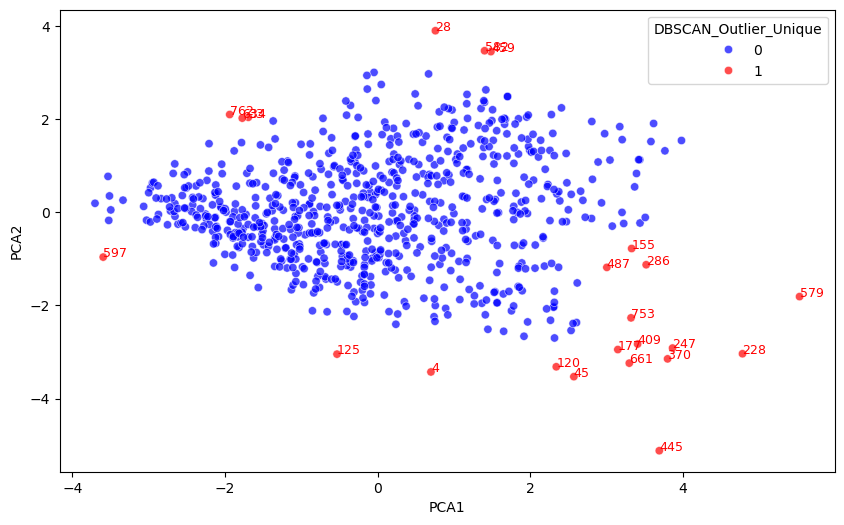

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifier les colonnes
print(pca_df.columns)

# Créer la colonne d'outliers unique si besoin
if 'DBSCAN_Outlier_Unique' not in pca_df.columns:
    if 'DBSCAN_Labels' in pca_df.columns:
        pca_df['DBSCAN_Outlier_Unique'] = (pca_df['DBSCAN_Labels'] == -1).astype(int)
    else:
        raise ValueError("La colonne 'DBSCAN_Outlier_Unique' ou 'DBSCAN_Labels' est absente dans pca_df")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x="PCA1",
    y="PCA2",
    hue="DBSCAN_Outlier_Unique",
    palette={0: "blue", 1: "red"},
    alpha=0.7
)

# Annoter uniquement les outliers
for i in pca_df[pca_df['DBSCAN_Outlier_Unique'] == 1].index:
    plt.text(
        pca_df.loc[i, "PCA1"],
        pca_df.loc[i, "PCA2"],
        str(i),
        fontsize=9,
        color="red"
    )

plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Supposons que tes données PCA sont dans pca_df[['PCA1', 'PCA2']]
X = pca_df[['PCA1', 'PCA2']].values

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Ajouter les labels DBSCAN au DataFrame
pca_df['DBSCAN_Labels'] = labels

# Créer une colonne binaire pour les outliers (labels == -1)
pca_df['DBSCAN_Outlier_Unique'] = (pca_df['DBSCAN_Labels'] == -1).astype(int)


In [ ]:
outlier_indices = pca_df[pca_df['DBSCAN_Outlier_Unique'] == 1]['Index']


In [ ]:
outlier_patients = df.loc[outlier_indices]
print(outlier_patients)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
4              0    137.0           40.0      35.000000  168.000000  43.1   
28            13    145.0           82.0      19.000000  110.000000  22.2   
33             6     92.0           92.0      13.333333   67.666667  19.9   
45             0    180.0           66.0      39.000000  375.666667  42.0   
120            0    162.0           76.0      56.000000  100.000000  53.2   
125            1     88.0           30.0      42.000000   99.000000  55.0   
155            7    152.0           88.0      44.000000  298.333333  50.0   
177            0    129.0          110.0      46.000000  130.000000  67.1   
228            4    197.0           70.0      39.000000  744.000000  36.7   
247            0    165.0           90.0      33.000000  680.000000  52.3   
286            5    155.0           84.0      44.000000  545.000000  38.7   
370            3    173.0           82.0      48.000000  465.000000  38.4   

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)  # Affiche tout si beaucoup d'outliers
display(outlier_patients[features])  # affiche seulement les colonnes importantes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
28,13,145.0,82.0,19.000000,110.000000,22.2,0.245,57
33,6,92.0,92.0,13.333333,67.666667,19.9,0.188,28
45,0,180.0,66.0,39.000000,375.666667,42.0,1.893,25
120,0,162.0,76.0,56.000000,100.000000,53.2,0.759,25
125,1,88.0,30.0,42.000000,99.000000,55.0,0.496,26
155,7,152.0,88.0,44.000000,298.333333,50.0,0.337,36
177,0,129.0,110.0,46.000000,130.000000,67.1,0.319,26
228,4,197.0,70.0,39.000000,744.000000,36.7,2.329,31
247,0,165.0,90.0,33.000000,680.000000,52.3,0.427,23


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

# 1. Sélection des colonnes à utiliser pour le clustering (sans 'Outcome')
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Ajout des labels au DataFrame
df['DBSCAN_Labels'] = labels


In [ ]:
# Patients sains détectés comme outliers
patients_normaux_detectes_outliers = df[(df['Outcome'] == 0) & (df['DBSCAN_Labels'] == -1)]
display(patients_normaux_detectes_outliers)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DBSCAN_Labels
12,10,139.0,80.0,24.000000,176.666667,27.10,1.441,57,0,-1
18,1,103.0,30.0,38.000000,83.000000,43.30,0.183,33,0,-1
28,13,145.0,82.0,19.000000,110.000000,22.20,0.245,57,0,-1
35,4,103.0,60.0,33.000000,192.000000,24.00,0.966,33,0,-1
42,7,106.0,92.0,18.000000,143.333333,22.70,0.235,48,0,-1
54,7,150.0,66.0,42.000000,342.000000,34.70,0.718,42,0,-1
57,0,100.0,88.0,60.000000,110.000000,46.80,0.962,31,0,-1
58,0,146.0,82.0,41.333333,182.333333,40.50,1.781,44,0,-1
62,5,44.0,62.0,29.333333,42.000000,25.00,0.587,36,0,-1
67,2,109.0,92.0,35.333333,133.333333,42.70,0.845,54,0,-1
